In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../dataset/ADNI/data_cleaned.csv")
data = data.set_index("RID")
list_rid = list(data.index.unique())
print("Number of patients: ", len(list_rid))
data

Number of patients:  1487


,PTID,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,...,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,Month,MRI,PET,DTI
RID,,,,,,,,,,,,,,,,,,,,,
3,011_S_0003,2005-09-12,AD,81.300000,Male,18,1.0,4.5,22.00,31.00,...,1129830.0,1791.0,15506.0,18422.0,1920690.0,Dementia,0,1,1,0
3,011_S_0003,2006-09-12,AD,82.300000,Male,18,1.0,3.5,24.00,35.00,...,1095640.0,1596.0,14617.0,17330.0,1903820.0,Dementia,12,1,1,0
3,011_S_0003,2007-09-12,AD,83.300000,Male,18,1.0,8.0,25.67,37.67,...,1088560.0,1175.0,14033.0,16398.0,1903420.0,Dementia,24,1,1,0
4,022_S_0004,2005-11-08,LMCI,67.500000,Male,10,0.0,1.0,14.33,21.33,...,1154980.0,3983.0,19036.0,19615.0,1679440.0,MCI,0,1,0,0
4,022_S_0004,2006-11-14,LMCI,68.516438,Male,10,0.0,1.0,15.00,22.00,...,1117390.0,3519.0,18691.0,19758.0,1656740.0,MCI,12,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,168_S_6874,2020-07-13,EMCI,76.500000,Female,14,0.0,2.0,8.33,17.33,...,887532.0,4463.0,16771.0,16563.0,1231140.0,MCI,0,0,1,0
6875,168_S_6875,2020-08-07,EMCI,73.300000,Male,12,0.0,0.5,8.33,14.33,...,991078.0,4172.0,15170.0,17957.0,1344660.0,MCI,0,0,0,0
6889,033_S_6889,2020-10-23,LMCI,67.800000,Male,18,0.0,1.0,18.00,25.00,...,NaN,NaN,NaN,NaN,NaN,MCI,0,0,1,0


## Age Distribution

CN :  76.68774381557493 6.55662706015031
MCI:  75.60359010108051 7.6345414163443195
AD :  77.48501691598393 7.463118723099417


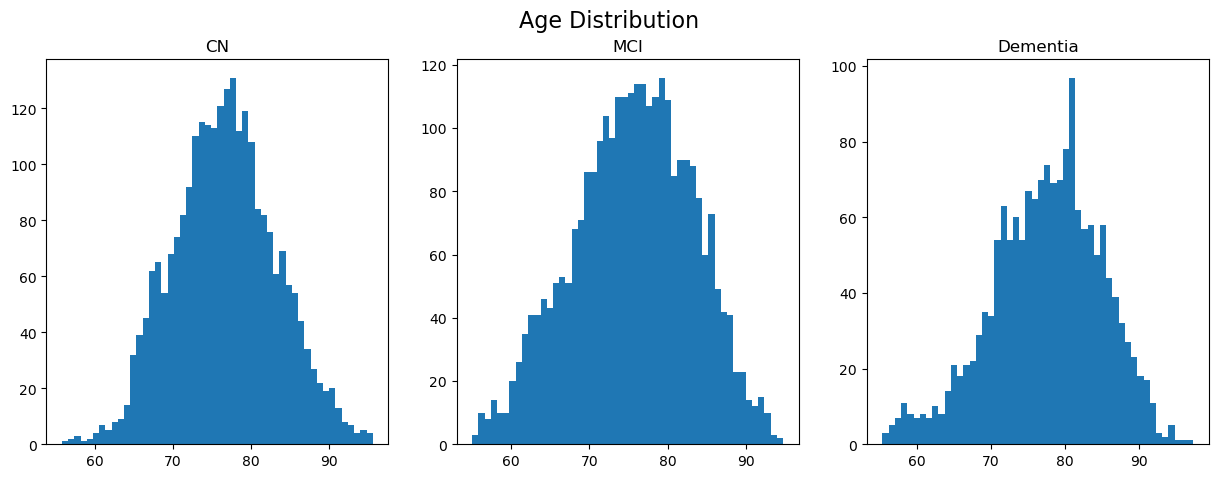

In [3]:
cn_age = data["AGE"][data["DX"]=="CN"]
mci_age = data["AGE"][data["DX"]=="MCI"]
ad_age = data["AGE"][data["DX"]=="Dementia"]
print("CN : ", cn_age.mean(), cn_age.std())
print("MCI: ", mci_age.mean(), mci_age.std())
print("AD : ", ad_age.mean(), ad_age.std())

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131) # specify as ax1
ax1.hist(cn_age, 50)
plt.title('CN')

fig.add_subplot(132)
plt.hist(mci_age, 50)
plt.title('MCI')

fig.add_subplot(133)
plt.hist(ad_age, 50)
plt.title('Dementia')

####
fig.suptitle('Age Distribution', fontsize=16)
plt.show()

## Gender

[[208. 266.]
 [285. 186.]
 [309. 233.]]
802 685


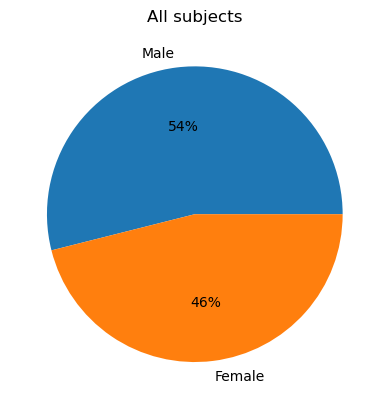

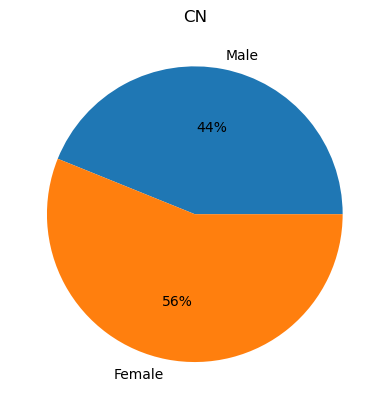

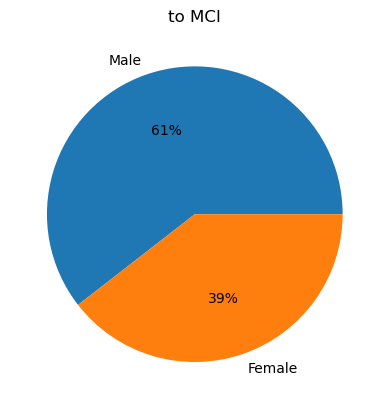

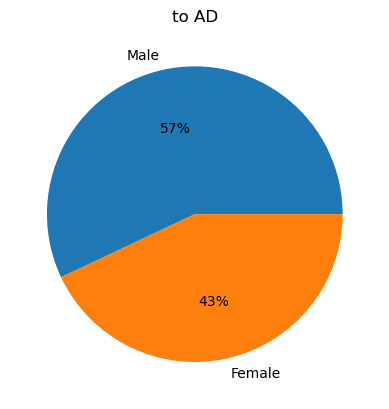

In [4]:
male, female = 0, 0
array = np.zeros((3, 2))
for rid in list_rid:

    if type(data["PTGENDER"].loc[rid]) is str: # Only baseline timestamp
        if "Male" == data["PTGENDER"].loc[rid]:
            male += 1
            if "Dementia" in list(data["DX"].loc[rid]):
                array[2, 0] += 1
            elif "MCI" in list(data["DX"].loc[rid]):
                array[1, 0] += 1
            else:
                array[0, 0] += 1
        else:
            female += 1
            if "Dementia" in list(data["DX"].loc[rid]):
                array[2, 1] += 1
            elif "MCI" in list(data["DX"].loc[rid]):
                array[1, 1] += 1
            else:
                array[0, 1] += 1
        continue
        
    if data["PTGENDER"].loc[rid].iloc[0] == "Male":
        male += 1
        if "Dementia" in list(data["DX"].loc[rid]):
            array[2, 0] += 1
        elif "MCI" in list(data["DX"].loc[rid]):
            array[1, 0] += 1
        else:
            array[0, 0] += 1
    else:
        female += 1
        if "Dementia" in list(data["DX"].loc[rid]):
            array[2, 1] += 1
        elif "MCI" in list(data["DX"].loc[rid]):
            array[1, 1] += 1
        else:
            array[0, 1] += 1
print(array)

labels = 'Male', 'Female'
sizes = [male, female]
print(male, female)
plt.pie(sizes, labels=labels,  autopct='%1.0f%%')
plt.title('All subjects')
plt.show()

labels = 'Male', 'Female'
sizes = [array[0, 0], array[0, 1]]
plt.pie(sizes, labels=labels,  autopct='%1.0f%%')
plt.title('CN')
plt.show()

labels = 'Male', 'Female'
sizes = [array[1, 0], array[1, 1]]
plt.pie(sizes, labels=labels,  autopct='%1.0f%%')
plt.title('to MCI')
plt.show()

labels = 'Male', 'Female'
sizes = [array[2, 0], array[2, 1]]
plt.pie(sizes, labels=labels,  autopct='%1.0f%%')
plt.title('to AD')
plt.show()

In [5]:
##  Image

In [6]:
n_timepoints = len(data)

n_mri_avail = np.array(data["MRI"]).sum()
n_pet_avail = np.array(data["PET"]).sum()
n_dti_avail = np.array(data["DTI"]).sum()
n_dx_avail  = np.array(~data["DX"].isnull()).sum() 
print(n_timepoints, n_mri_avail, n_pet_avail, n_dti_avail, n_dx_avail)

bl_dx = np.zeros(3)
for rid in list_rid:

    if type(data["PTGENDER"].loc[rid]) is str: # Only baseline timestamp:
        bl_dx_mri = np.array(data.loc[rid]["MRI"])
        bl_dx_pet = np.array(data.loc[rid]["PET"])
        bl_dx_dti = np.array(data.loc[rid]["DTI"])
    else:
        bl_dx_mri = np.array(data.loc[rid]["MRI"])[0]
        bl_dx_pet = np.array(data.loc[rid]["PET"])[0]
        bl_dx_dti = np.array(data.loc[rid]["DTI"])[0]
    
    if bl_dx_mri == 1:
        bl_dx[0] += 1
    if bl_dx_pet == 1:
        bl_dx[1] += 1
    if bl_dx_dti == 1:
        bl_dx[2] += 1
bl_dx

7327 4814 3237 519 7052


array([1256., 1142.,  169.])

In [7]:
statastic_dx = np.zeros((34, 3))
for rid in list_rid:
    if type(data["PTGENDER"].loc[rid]) is str: # Only baseline timestamp:
        if np.array(data.loc[rid]["MRI"]) == 1:
            statastic_dx[0, 0] += 1
        if np.array(data.loc[rid]["PET"]) == 1:
            statastic_dx[0, 1] += 1
        if np.array(data.loc[rid]["DTI"]) == 1:
            statastic_dx[0, 2] += 1
    else:
        patientInfo = np.array(data.loc[rid][["MRI", "PET", "DTI", "Month"]])
        for i in range(len(patientInfo)):
            if patientInfo[i, 0] == 1:
                statastic_dx[patientInfo[i, 3]//6, 0] += 1 
            if patientInfo[i, 1] == 1:
                statastic_dx[patientInfo[i, 3]//6, 1] += 1 
            if patientInfo[i, 2] == 1:
                statastic_dx[patientInfo[i, 3]//6, 2] += 1 
        

statastic_dx

array([[1.256e+03, 1.142e+03, 1.690e+02],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [1.120e+03, 2.810e+02, 1.240e+02],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [1.045e+03, 7.900e+02, 1.240e+02],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [4.120e+02, 1.690e+02, 2.400e+01],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [4.060e+02, 3.560e+02, 5.900e+01],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [1.790e+02, 1.080e+02, 8.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [1.480e+02, 1.190e+02, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [1.130e+02, 8.000e+01, 4.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [7.000e+01, 6.700e+01, 3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [3.700e+01, 3.700e+01, 3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [2.700e+01, 4.400e+01, 1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.900e+01, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.00

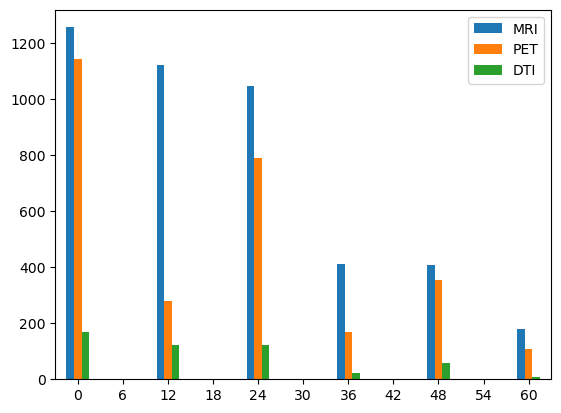

In [8]:
index = [i*6 for i in range(11)]
df = pd.DataFrame({'MRI': statastic_dx[:11, 0],
                   'PET': statastic_dx[:11, 1],
                    'DTI': statastic_dx[:11, 2],}, index=index)
ax = df.plot.bar(rot=0)

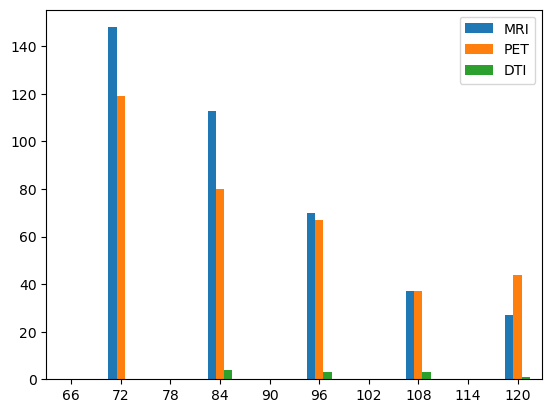

In [9]:
index = [i*6 for i in range(11,21)]
df = pd.DataFrame({'MRI': statastic_dx[11:21, 0],
                   'PET': statastic_dx[11:21, 1],
                    'DTI': statastic_dx[11:21, 2],}, index=index)
ax = df.plot.bar(rot=0)

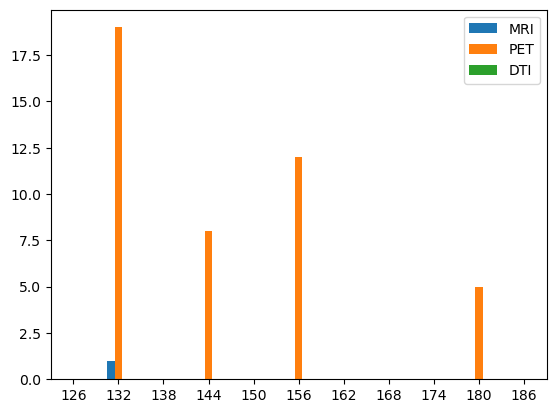

In [10]:
index = [i*6 for i in range(21,32)]
df = pd.DataFrame({'MRI': statastic_dx[21:32, 0],
                   'PET': statastic_dx[21:32, 1],
                    'DTI': statastic_dx[21:32, 2],}, index=index)
ax = df.plot.bar(rot=0)

In [11]:
### Check cognitive score